In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib as mpl

## THIS IS THE START OF MY END TO END MLOPS RESEARCH PROJECT

In [2]:
url = '/Users/macbookpro/Desktop/aws-docs/Portfolio_Projects/Aws_MLOPs/nba-data/seasons_total.pq'
x = pd.read_parquet(url)

In [3]:
x

,Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,TRB,AST,STL,BLK,TOV,PF,PTS,team,year,team_retcon
0,1.0,Christian Laettner,25.0,81,80.0,2770.0,450.0,920.0,0.489,13.0,...,613.0,234.0,101.0,87.0,225.0,302.0,1322.0,MIN,1995,MIN
1,2.0,Isaiah Rider,23.0,75,67.0,2645.0,558.0,1249.0,0.447,139.0,...,249.0,245.0,69.0,23.0,232.0,194.0,1532.0,MIN,1995,MIN
2,3.0,Sean Rooks,25.0,80,70.0,2405.0,289.0,615.0,0.470,0.0,...,486.0,97.0,29.0,71.0,142.0,208.0,868.0,MIN,1995,MIN
3,4.0,Doug West,27.0,71,65.0,2328.0,351.0,762.0,0.461,11.0,...,227.0,185.0,65.0,24.0,126.0,250.0,919.0,MIN,1995,MIN
4,5.0,Winston Garland,30.0,73,58.0,1931.0,170.0,410.0,0.415,19.0,...,168.0,318.0,71.0,13.0,105.0,184.0,448.0,MIN,1995,MIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12693,20.0,Jeenathan Williams,23.0,5,4.0,127.0,24.0,39.0,0.615,3.0,...,15.0,10.0,3.0,2.0,4.0,13.0,53.0,POR,2023,POR
12694,21.0,Shaquille Harrison,29.0,5,0.0,120.0,15.0,36.0,0.417,3.0,...,22.0,30.0,11.0,2.0,6.0,12.0,44.0,POR,2023,POR
12695,22.0,Greg Brown III,21.0,16,0.0,93.0,11.0,28.0,0.393,1.0,...,19.0,3.0,4.0,5.0,6.0,13.0,28.0,POR,2023,POR
12696,23.0,Justin Minaya,23.0,4,0.0,89.0,7.0,23.0,0.304,3.0,...,15.0,4.0,2.0,5.0,4.0,9.0,17.0,POR,2023,POR


In [4]:
x.shape

(12698, 31)

In [5]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
Rk,12698.0,8.521263,5.338157,1.0,4.000,8.000,12.000,30.0
Age,12698.0,26.741298,4.236893,18.0,23.000,26.000,30.000,43.0
G,12698.0,28.860608,26.475878,1.0,6.000,17.000,51.000,82.0
GS,12698.0,14.173413,21.477584,0.0,0.000,4.000,18.000,82.0
MP,12698.0,605.996842,813.336567,0.0,23.300,100.000,1042.000,3464.0
FG,12698.0,93.137526,140.400890,0.0,2.700,11.200,141.000,815.0
FGA,12698.0,208.216475,309.350311,0.0,6.300,28.000,318.000,1927.0
FG%,12565.0,0.428887,0.121380,0.0,0.385,0.432,0.483,1.0
3P,12698.0,17.645621,35.635988,0.0,0.000,1.000,15.000,337.0
3PA,12698.0,50.484651,97.000914,0.0,0.525,3.800,50.000,801.0


In [6]:
# Loop through field goal percent column and set nan to 0
for i in range(len(x)):
    if pd.isna(x.loc[i,'FT%']):
        x.loc[i,'FT%'] = 0

<Axes: xlabel='FT%', ylabel='FTA'>

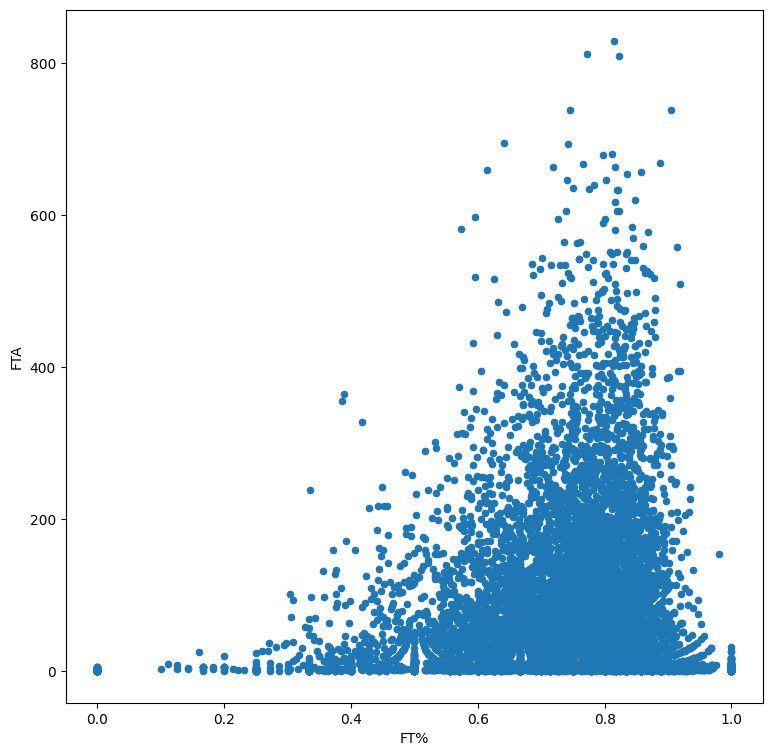

In [13]:
x.plot(x = 'FT%',
       y = 'FTA',
       kind='scatter',
       figsize = (9,9),
)